# Lecture 6: Introduction to numerical integration

## Two broad uses for numerical integration

+ You can calculate the value of a function anywhere you want... 
+ You have a table or list of the values of a function at fixed locations...

...but you cannot do the integral analytically.

## Big idea: break integral into small pieces, add them up

+ In each piece, approximate function by some shape
+ Estimate error in making this approximation
+ Add the pieces up

## A few approximations

### Which approximation below is most accurate and why?

![Three integration methods](media/06-three-graphs.png)

## Counting: *intervals* vs *points*

![Number line with intervals and endpoints](media/06-intervals.png)

In diagram above there are $N$ **intervals**. 

+ How many points?
+ What is $h$ in terms of $a$, $b$, $N$?

+ $N+ 1$ points
+ $h = (b - a)/N$

## Roughest estimate: midpoint rule

<img src="media/Hour07_Intro_to_Integration.png" style="height:200px"/>

+ In each interval: $\int_x^{x+h} f(x) dx \approx f(x+h/2) h$
+ Add the intervals up: $\int_a^b f(x) dx \approx $

## Roughest estimate: midpoint rule

<img src="media/06-Intro_to_Integration.png" style="height:200px"/>

+ In each interval: $\int_x^{x+h} f(x) dx \approx f(x+h/2) h$
+ Add the intervals up: $\int_a^b f(x) dx \approx f(a+h/2) + f(a + 3h/2) + \ldots + f(a + (2N-1)h/2)$

## Midpoint rule: general formula

+ For $N$ **intervals** of width $h$ the midpoint rule is

$$
\int_a^b f(x) dx \approx h \sum_{n=0}^{N-1} f\left(a + (2n + 1)({h}/{2})\right)
$$


## Example integrand

+ As a concrete example we will use this function: $f(x) = \frac{1}{3} x^3 - \frac{11}{4} x^2 + 7x$.
+ Nothing special, except it is straightforward to integrate by hand, and it matches the figures above.

In [1]:
def func(x):
    """
    Return the value of the polynomial x^3/3 - 11 x^2/4 + 7x.
    
    Parameters
    ----------
    
    x : number
        Point at which to evaluate the function.
    
    Returns
    -------
    
    float
        Value of function at input point.
    """
    return  x**3 / 3 - 11/4 * x**2 + 7 * x 



### Quick graph of the function of interest

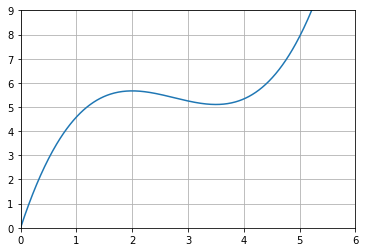

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

a = 0
b = 6
x = np.linspace(a, b, num=501)
plt.plot(x, func(x))
plt.ylim(0, 9)
plt.xlim(0, 6)
plt.grid()

## Assume the rest of the Python snippets have already run this

In [4]:
import numpy as np

N = 10
a = 1
b = 5
h = (b - a) / N

## A (slow) Python approach

Given function `func(x)`, with `N` **intervals** from `a` to `b`

```python
midpoint_int = 0
for n in range(N):
    midpoint_int = midpoint_int + h * func(a + (2 * n + 1)*h/2)
print(midpoint_int)
```

In [5]:
midpoint_int = 0
for n in range(N):
    print(n, a + (2 * n + 1)*h/2)
    midpoint_int = midpoint_int + h * func(a + (2 * n + 1)*h/2)
print(midpoint_int)

0 1.2
1 1.6
2 2.0
3 2.4000000000000004
4 2.8
5 3.2
6 3.6
7 4.0
8 4.4
9 4.800000000000001
22.320000000000007


## A faster Python approach

```python
x_points = np.linspace(a, b, num=N + 1) + h / 2
```

```python
midpoint_int = sum(h * func(x_points[:-1]))
```

In [6]:
x_points = np.linspace(a, b, num=N + 1) + h / 2
print(x_points[:-1])
midpoint_int = sum(h * func(x_points[:-1]))
print(midpoint_int)

[1.2 1.6 2.  2.4 2.8 3.2 3.6 4.  4.4 4.8]
22.32


## Trapezoidal rule

![One interval with trapezoid](media/06-one-trapezoid.png)

#### What is area of grey region?

## Two steps: what is area?

![Two trapezoidal intervals](media/06-two-trapezoid.png)



## Now $N$ intervals

![N trapezoidal intervals](media/06-N-trapezoid.png)

## Trapezoidal rule

$$\int_a^b f(x) dx \approx \frac{h}{2} \left( f(a) + 2f(a +h) + \cdots + 2f(a + (N-1)h) + f(a + Nh)\right)
$$

You will implement this in lab this week!